## Segmenter la base de clients d'un site web de commerce électroniquee


Votre objectif est de comprendre les différents types d’utilisateurs grâce à leur comportement et à leurs données personnelles.

Vous devrez fournir à l’équipe marketing une description actionnable de votre segmentation et de sa logique sous-jacente pour une utilisation optimale.

<img src="https://i.imgur.com/HRhd2Y0.png" style="height:600px">



### Importing libraries

In [12]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings( 'ignore' )

### Reading all the csv files

In [13]:
data_customer = pd.read_csv('archive/olist_customers_dataset.csv')
data_geolocation = pd.read_csv('archive/olist_geolocation_dataset.csv')
data_orders = pd.read_csv('archive/olist_orders_dataset.csv')
data_order_items = pd.read_csv('archive/olist_order_items_dataset.csv')
data_order_payments = pd.read_csv('archive/olist_order_payments_dataset.csv')
data_order_reviews = pd.read_csv('archive/olist_order_reviews_dataset.csv')
data_products = pd.read_csv('archive/olist_products_dataset.csv')
data_sellers = pd.read_csv('archive/olist_sellers_dataset.csv')

### EDA 

#### 1.1 Analyse des données client

There are 4119 unique cities in the database.

TOP 20 cities covers 42.2 percent of all the orders.


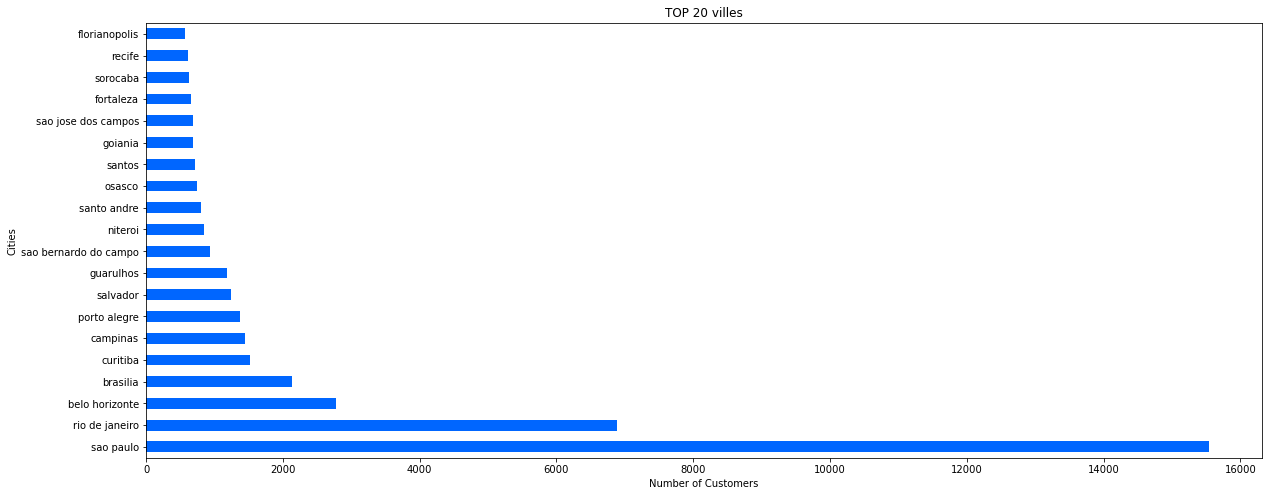

In [14]:
plt.figure(figsize=(20, 8))  

colors = ['#0066ff', '#ffcc99', '#99ff99', '#66b3ff']
cities = data_customer["customer_city"].nunique()
citesTop = data_customer.groupby('customer_city')['customer_id'].nunique().sort_values(ascending=False)
print("There are",cities,"unique cities in the database.")
print("\nTOP 20 cities covers", round(citesTop.head(20).sum()/data_customer.shape[0]*100,1),"percent of all the orders.")

citesTop.head(20).plot.barh(color=colors[0])
plt.ylabel("Cities")
plt.xlabel("Number of Customers")
plt.title("TOP 20 villes")

plt.show()

La plupart des clients proviennent de São Paulo, la ville avec le plus grand nombre de clients.

#### 1.2 Analyse des Commandes / Orders

In [15]:
orders_fmt = data_orders.copy()
orders_fmt["order_purchase_timestamp"] = pd.to_datetime(data_orders["order_purchase_timestamp"], format='%Y-%m-%d %H:%M:%S')
orders_fmt["order_delivered_carrier_date"] = pd.to_datetime(data_orders["order_delivered_carrier_date"], format='%Y-%m-%d %H:%M:%S')
orders_fmt["order_delivered_customer_date"] = pd.to_datetime(data_orders["order_delivered_customer_date"], format='%Y-%m-%d %H:%M:%S')
orders_fmt["order_estimated_delivery_date"] = pd.to_datetime(data_orders["order_estimated_delivery_date"], format='%Y-%m-%d %H:%M:%S')

##### Vérification du statut de la commande par rapport au nombre de clients

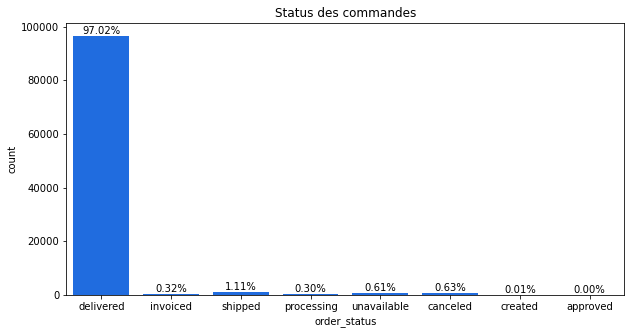

In [16]:
plt.figure(figsize=(10, 5))

colors = ['#0066ff', '#ffcc99', '#99ff99', '#66b3ff']
plots = sns.countplot(x="order_status", data=data_orders , color=colors[0])

for bar in plots.patches:
    plots.annotate(format(((bar.get_height()/len(data_orders['order_status'])*100)), '.2f')+"%",
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
 
plt.title("Status des commandes")
plt.show()


La plupart des produits sont livrés, mais il y a toujours 3 % qui étaient en cours de traitement, annulés ou non disponibles. Ils n'ont pas été livrés.

##### Heure d'achat / Time of purchase 

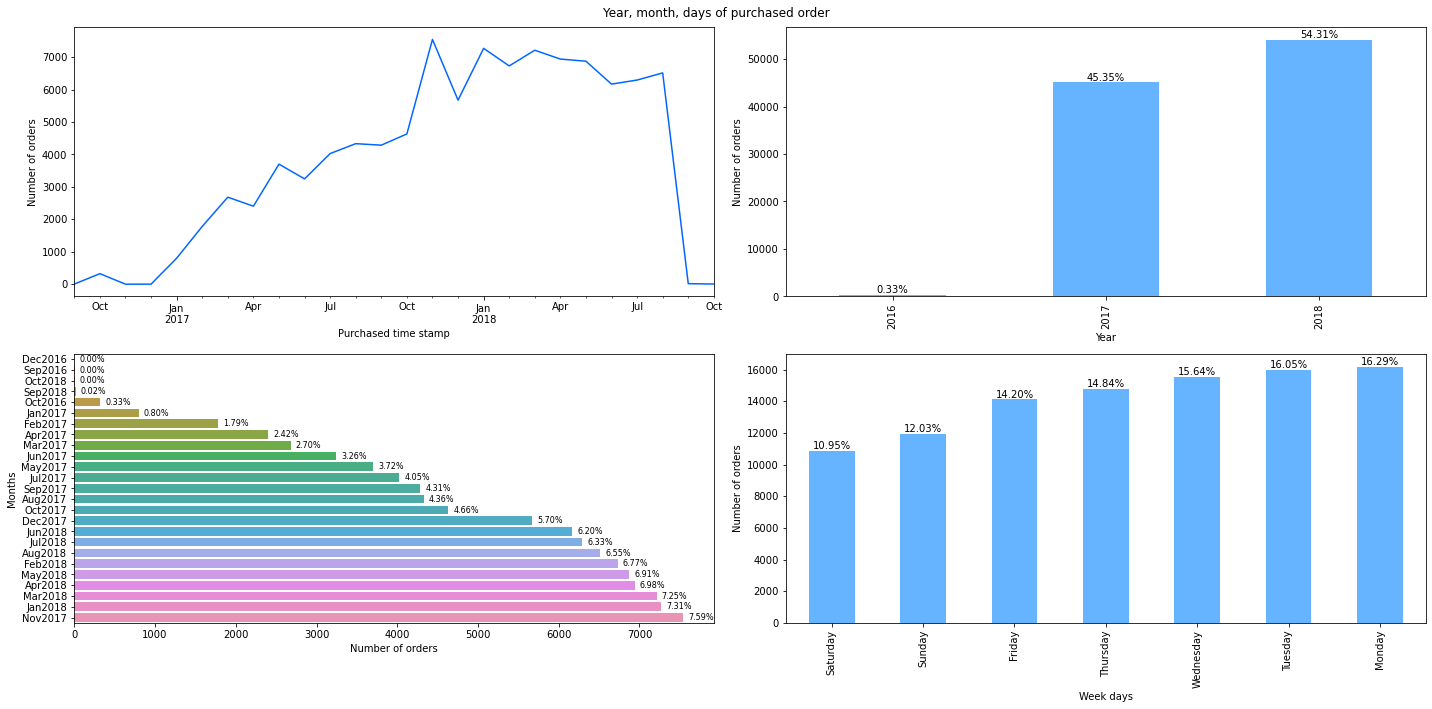

In [20]:
fig, ax= plt.subplots(2, 2, figsize=(20,10), tight_layout=True)

fig.suptitle("Year, month, days of purchased order")
# line chart for all over purchase timestamp
counts = orders_fmt.set_index("order_purchase_timestamp").groupby(pd.Grouper(freq='M')).count()
counts.plot(y = "order_id", color=colors[0], legend=False, ax=ax[0][0])
ax[0][0].set_xlabel("Purchased time stamp")
ax[0][0].set_ylabel("Number of orders")

# order purchased thorugh years
orders_fmt['Year'] = orders_fmt['order_purchase_timestamp'].dt.year
barPlot = orders_fmt.groupby('Year').size().plot(kind = 'bar', ax=ax[0][1], color='#66b3ff')
ax[0][1].set_ylabel("Number of orders")
ax[0][1].set_xlabel("Year")
for bar in barPlot.patches:
    barPlot.annotate(format(((bar.get_height()/len(orders_fmt['Year'])*100)), '.2f')+"%",
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

# order purchased through months 
orders_fmt['month'] = orders_fmt['order_purchase_timestamp'].dt.strftime('%b%Y')
barPlot2 = sns.barplot(y=orders_fmt.groupby('month').size().sort_values().index, x=orders_fmt.groupby('month').size().sort_values().values, ax=ax[1][0])
ax[1][0].set_xlabel("Number of orders")
ax[1][0].set_ylabel("Months")
for p in barPlot2.patches:
    barPlot2.annotate(format(((p.get_width()/len(orders_fmt['month'])*100)), '.2f')+"%", xy=(p.get_width(), p.get_y()+p.get_height()/2),xytext=(5, 0), textcoords='offset points', ha="left", va="center",fontsize=8)

#order purchased through weekdays
orders_fmt['weekdays'] = orders_fmt['order_purchase_timestamp'].dt.day_name()
barPlot3 = orders_fmt.groupby('weekdays').size().sort_values().plot(kind = 'bar', ax=ax[1][1], color='#66b3ff')
ax[1][1].set_ylabel("Number of orders")
ax[1][1].set_xlabel("Week days")
for bar in barPlot3.patches:
    barPlot3.annotate(format(((bar.get_height()/len(orders_fmt['weekdays'])*100)), '.2f')+"%",
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

plt.show()

##### Vérification du statut de la commande par rapport au nombre de clients

##### Jours de livraison

<Axes: title={'center': 'Number of orders delivered late'}, ylabel='Number of orders'>

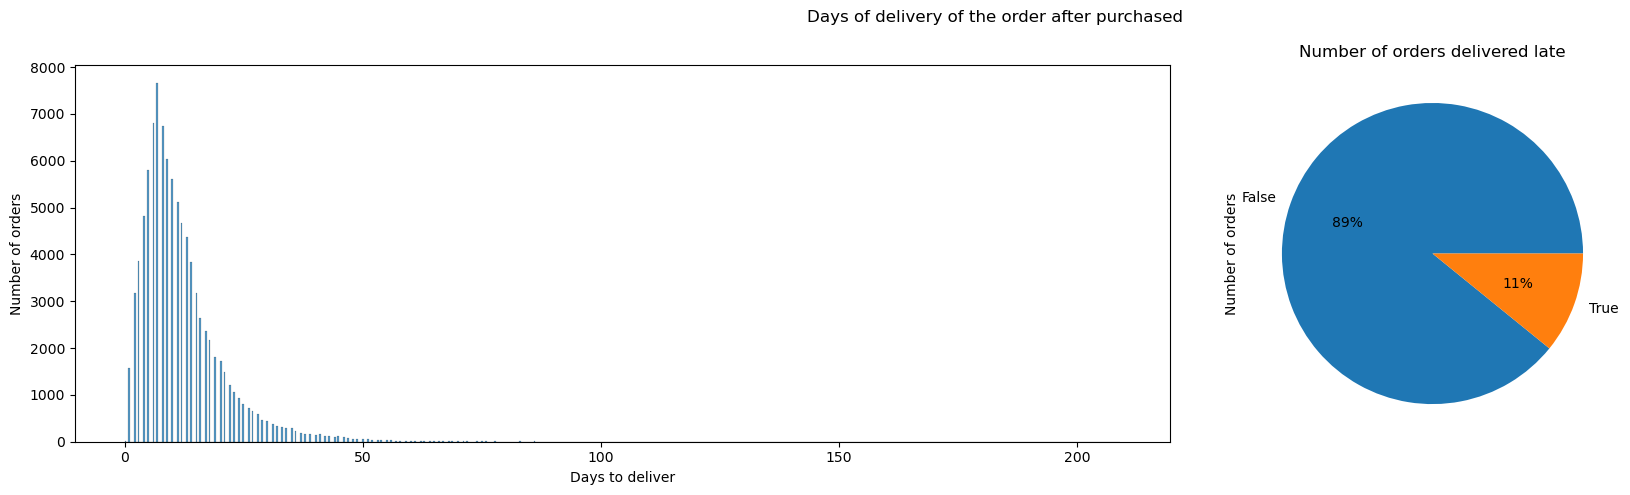

In [9]:
fig, ax= plt.subplots(1, 2, figsize=(20,5), tight_layout=True)
fig.suptitle('Days of delivery of the order after purchased')
orders_fmt['day_to_delivery']=(orders_fmt['order_delivered_customer_date']-orders_fmt['order_purchase_timestamp']).dt.days
orders_fmt['delivery'] = (orders_fmt['order_estimated_delivery_date']-orders_fmt['order_delivered_customer_date']).dt.days
orders_fmt['late_delivery'] = np.where(orders_fmt['delivery'] >= 0, False, True)

# days to deliver
sns.histplot(data= orders_fmt, x= 'day_to_delivery', ax=ax[0])
ax[0].set_xlabel("Days to deliver")
ax[0].set_ylabel("Number of orders")

# the delivery is late or not
orders_fmt.groupby(['late_delivery']).size().plot(kind='pie',ylabel='Number of orders', autopct='%1.0f%%', title='Number of orders delivered late', ax=ax[1])

#### Paiements

In [23]:
data_order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


<AxesSubplot:title={'center':'Type of payments'}>

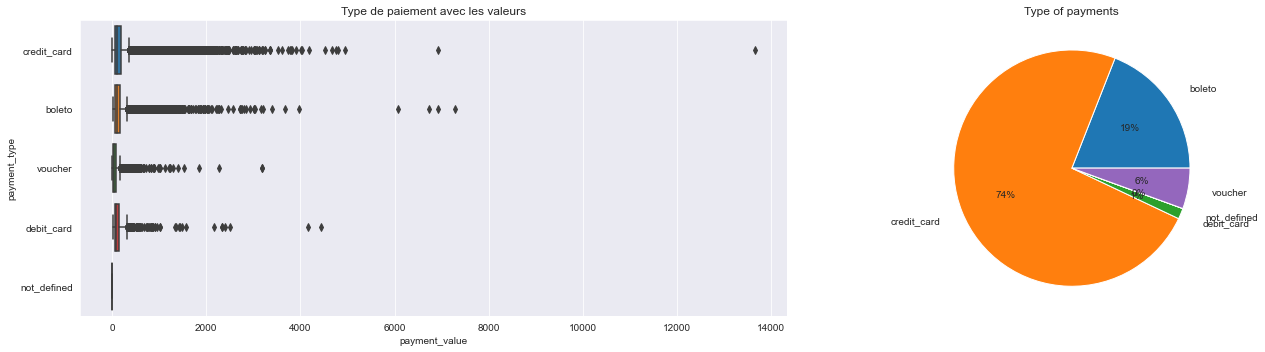

In [24]:
fig, ax= plt.subplots(1, 2, figsize=(20,5), tight_layout=True)

sns.boxplot(data=data_order_payments, x="payment_value", y="payment_type", ax=ax[0])
ax[0].set_title("Type de paiement avec les valeurs")

data_order_payments.groupby(['payment_type']).size().plot(kind='pie', autopct='%1.0f%%', title='Type of payments', ax=ax[1], labeldistance=1.2)


* Le mode de paiement le plus courant est la "Carte de crédit".

* Boleto bancário est la méthode de paiement en espèces la plus populaire au Brésil, pratiquement à l'épreuve de la fraude. Cette méthode de paiement génère plus de 19 % de toutes les transactions de paiement en ligne.

#### Avis

In [25]:
data_order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

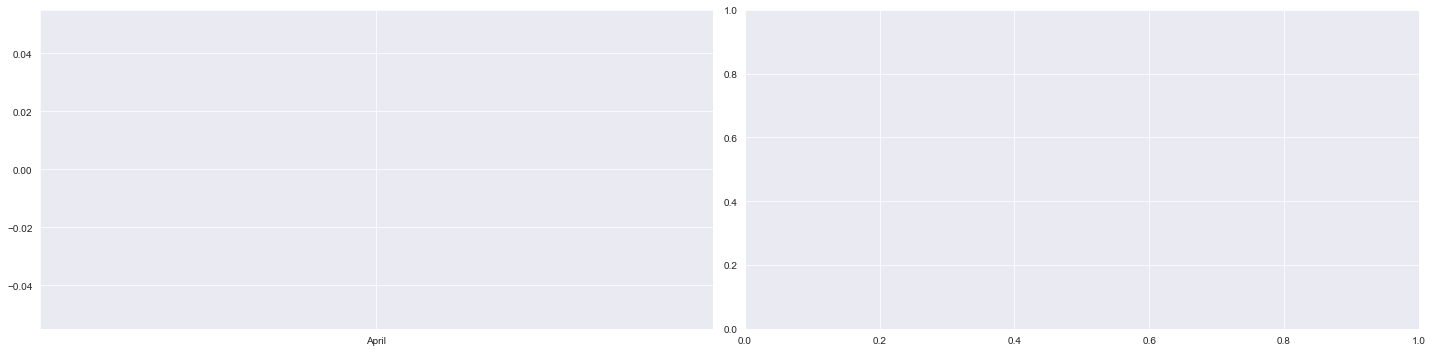

In [26]:
datacheck = data_order_reviews.copy()
datacheck['review_creation_date'] = pd.to_datetime(data_order_reviews['review_creation_date'], format='%Y-%m-%d %H:%M:%S')
datacheck["months"] = datacheck['review_creation_date'].dt.month_name()



fig, ax= plt.subplots(1, 2, figsize=(20,5), tight_layout=True)

sns.lineplot( data=datacheck.groupby(['months'], as_index=False)['review_score'].value_counts(),  x='months', y='count', hue= 'review_score', palette='Set1', ax=ax[0])
ax[0].set_title("Série temporelle des avis")

datacheck.groupby(['review_score']).size().plot(kind='pie', autopct='%1.0f%%', title='Review score', ax=ax[1], labeldistance=1.2)


#### Produits

In [20]:
data_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Text(0.5, 1.0, 'Catégorie de produit')

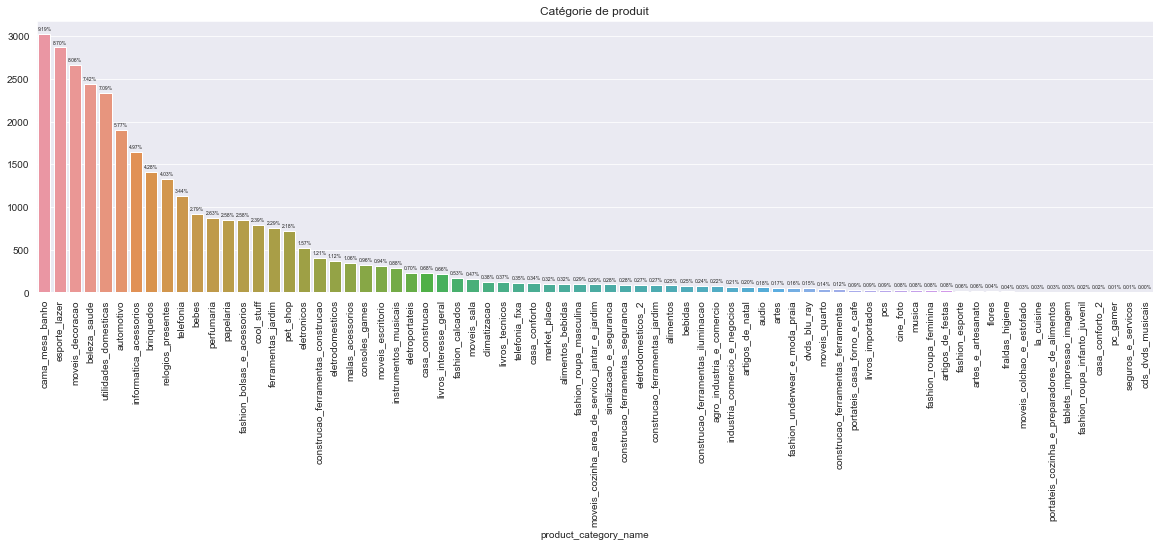

In [21]:
top_10_category = data_products["product_category_name"].value_counts().sort_values(ascending=False)

fig=plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
plot=sns.barplot(x=top_10_category.index, y=top_10_category.values)
for bar in plot.patches:
    plot.annotate(format(((bar.get_height()/len(data_products["product_category_name"]))*100), '.2f')+"%",
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=5, xytext=(0, 5),
                   textcoords='offset points')
plt.xticks(rotation=90)
plt.title('Catégorie de produit')

#### Sellers

In [22]:
data_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Text(0, 0.5, 'No. of Sellers')

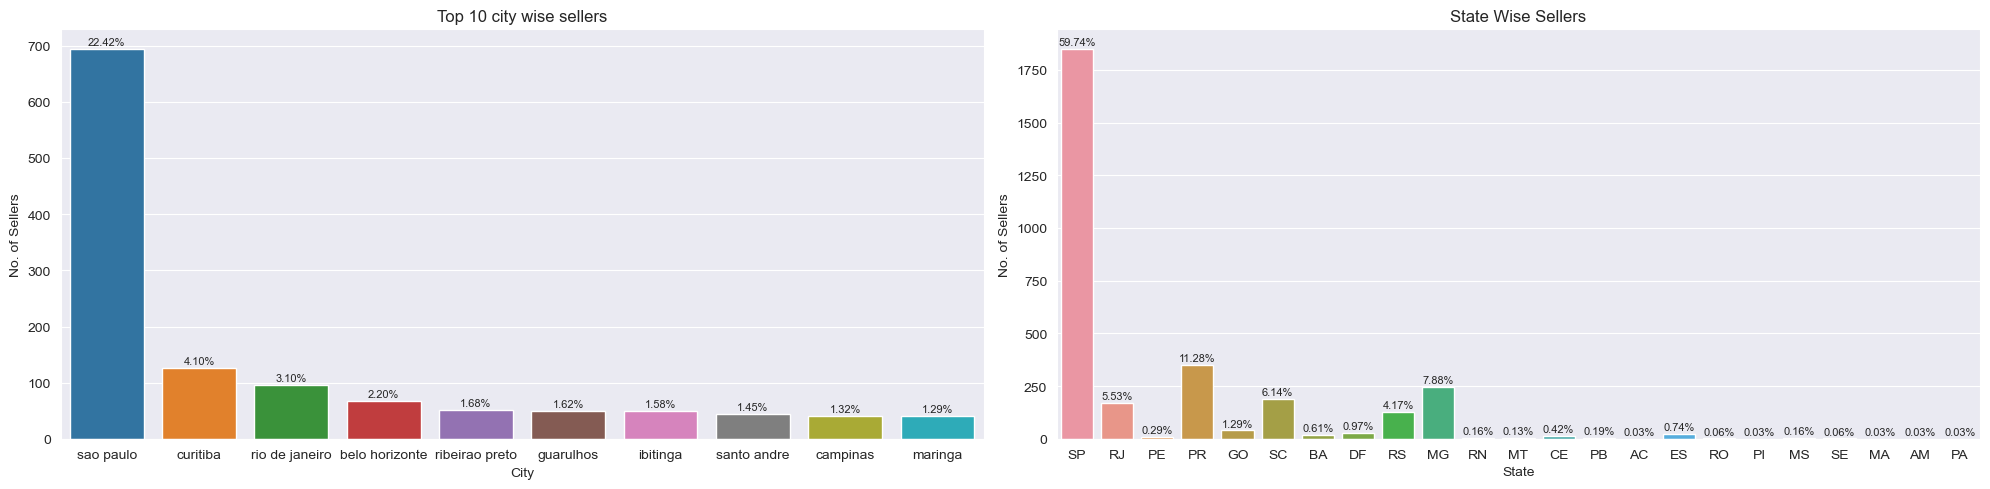

In [15]:
fig, ax= plt.subplots(1, 2, figsize=(20,5), tight_layout=True)

sellercity = data_sellers["seller_city"].value_counts().sort_values(ascending=False)[:10]

plot1 = sns.barplot(x=sellercity.index, y=sellercity.values,ax=ax[0])
# ax[0].set_xticks(ticks= [1,2,3,4,5,6,7,8,9,10],labels=np.array(data_sellers["seller_city"].value_counts().sort_values(ascending=False).index[0:10]))
for bar in plot1.patches:
    plot1.annotate(format(((bar.get_height()/len(data_sellers["seller_city"]))*100), '.2f')+"%",
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 5),
                   textcoords='offset points')
ax[0].set_title('Top 10 city wise sellers')
ax[0].set_xlabel('City')
ax[0].set_ylabel('No. of Sellers')


plot2 = sns.countplot(x='seller_state', data=data_sellers, ax=ax[1])
for bar in plot2.patches:
    plot2.annotate(format(((bar.get_height()/len(data_sellers["seller_city"]))*100), '.2f')+"%",
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 5),
                   textcoords='offset points')
ax[1].set_title('State Wise Sellers')
ax[1].set_xlabel('State')
ax[1].set_ylabel('No. of Sellers')

### Merging All Dataframes

In [16]:

data_train = data_orders.merge(data_customer, on="customer_id").merge(data_order_items, on="order_id").merge(data_products, on="product_id").merge(data_order_payments, on="order_id").merge(data_sellers, on="seller_id").merge(data_order_reviews, on="order_id")

data_geolocation['customer_zip_code_prefix'] = data_geolocation['geolocation_zip_code_prefix']
geol = data_geolocation.groupby(['customer_zip_code_prefix'],as_index=False).agg({
  'geolocation_lat':'mean',
  'geolocation_lng':'mean'
})
data_train = data_train.merge(geol,how='left',on='customer_zip_code_prefix')
data_train.shape

(117329, 41)

In [18]:
data_train.describe().round(2)

customer_zip_code_prefix  order_item_id      price  freight_value  \
count                 117329.00      117329.00  117329.00      117329.00   
mean                   35060.12           1.19     120.52          20.03   
std                    29849.50           0.68     182.94          15.83   
min                     1003.00           1.00       0.85           0.00   
25%                    11250.00           1.00      39.90          13.08   
50%                    24240.00           1.00      74.90          16.28   
75%                    58770.00           1.00     134.90          21.18   
max                    99990.00          21.00    6735.00         409.68   

       product_name_lenght  product_description_lenght  product_photos_qty  \
count            115634.00                   115634.00           115634.00   
mean                 48.77                      785.80                2.21   
std                  10.03                      652.38                1.72   
min                   5.00                        4.00                1.00   
25%                  42.00                      346.00                1.00   
50%                  52.00                      600.00                1.00   
75%                  57.00                      983.00                3.00   
max                  76.00                     3992.00               20.00   

       product_weight_g  product_length_cm  product_height_cm  \
count         117309.00          117309.00          117309.00   
mean            2110.76              30.25              16.61   
std             3785.13              16.18              13.45   
min                0.00               7.00               2.00   
25%              300.00              18.00               8.00   
50%              700.00              25.00              13.00   
75%             1800.00              38.00              20.00   
max            40425.00             105.00             105.00   

       product_width_cm  payment_sequential  payment_installments  \
count         117309.00           117329.00             117329.00   
mean              23.07                1.09                  2.94   
std               11.75                0.73                  2.78   
min                6.00                1.00                  0.00   
25%               15.00                1.00                  1.00   
50%               20.00                1.00                  2.00   
75%               30.00                1.00                  4.00   
max              118.00               29.00                 24.00   

       payment_value  seller_zip_code_prefix  review_score  geolocation_lat  \
count      117329.00               117329.00     117329.00        117013.00   
mean          172.06                24450.78          4.03           -21.24   
std           265.39                27582.36          1.39             5.56   
min             0.00                 1001.00          1.00           -33.69   
25%            60.75                 6429.00          4.00           -23.59   
50%           108.10                13660.00          5.00           -22.93   
75%           189.06                28035.00          5.00           -20.18   
max         13664.08                99730.00          5.00            42.18   

       geolocation_lng  
count        117013.00  
mean            -46.20  
std               4.04  
min             -72.67  
25%             -48.11  
50%             -46.63  
75%             -43.63  
max              -8.72

## Data cleaning
1. Handling missing values.
2. Handling duplicate values.
3. Handling the time format.

#### Missing value

In [19]:
# Function to calculate missing values by column
def missing_values(df):
        # Total missing values
        mis_val = df.isnull().sum()
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("The dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [20]:
missing_values(data_train)

The dataframe has 41 columns.
There are 15 columns that have missing values.


Missing Values  % of Total Values
review_comment_title                   103437               88.2
review_comment_message                  67650               57.7
order_delivered_customer_date            2471                2.1
product_category_name                    1695                1.4
product_name_lenght                      1695                1.4
product_description_lenght               1695                1.4
product_photos_qty                       1695                1.4
order_delivered_carrier_date             1235                1.1
geolocation_lat                           316                0.3
geolocation_lng                           316                0.3
product_weight_g                           20                0.0
product_length_cm                          20                0.0
product_height_cm                          20                0.0
product_width_cm                           20                0.0
order_approved_at                          15                0.0

<Axes: >

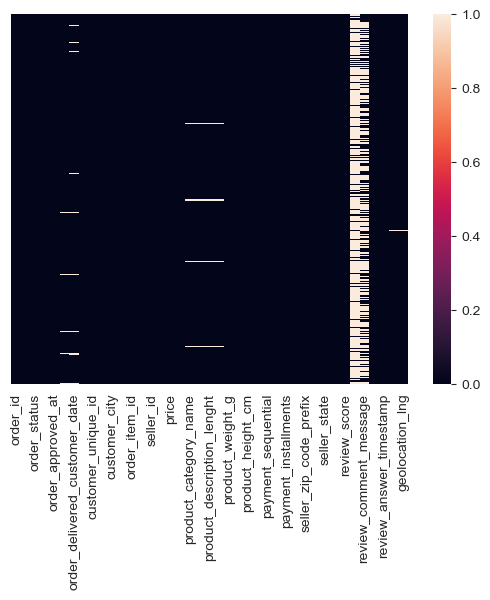

In [21]:
sns.heatmap(data_train.isnull(), yticklabels=False)

#### Treating the missing value by iterative imputation for numerical values nd most frequent value imputation for categorical values.

In [22]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [23]:
data_missing_columns = data_train.columns.drop(['review_comment_title', "review_comment_message", 'order_id', 'customer_id', 'product_id','customer_unique_id', 'order_item_id', 'seller_id', 'review_id'])

# select numerical columns 
numerical_col_train = data_train[data_missing_columns].select_dtypes(include=[np.number]).columns

# Numercial missing value imputation
imputer  = IterativeImputer(max_iter=25, random_state=0)
imputed = imputer.fit_transform(data_train[numerical_col_train])
data_train[numerical_col_train] = pd.DataFrame(imputed, columns=numerical_col_train)

# # Selecting the categorical variables
categorical_col_train = data_train[data_missing_columns].select_dtypes(exclude=[np.number]).columns

# Categorical missing value imputation
imputerSimple = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
data_train[categorical_col_train] = imputerSimple.fit_transform(data_train[categorical_col_train])

Replacing the customer review title and message with empty string "Missing", as to state that the customer did review but didnt wrote a message or a title

In [24]:
imputerSimpleReview = SimpleImputer(strategy='constant', fill_value='')
data_train.loc[:,['review_comment_title', 'review_comment_message']] = imputerSimpleReview.fit_transform(data_train.loc[:,['review_comment_title', 'review_comment_message']])

In [25]:
missing_values(data_train)


The dataframe has 41 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

#### Duplicate values

In [26]:
print("The total number of duplicate rows are" , data_train.duplicated().sum())

The total number of duplicate rows are 0


#### Time Format

In [27]:
time_sol = ['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date','shipping_limit_date',
       'review_creation_date', 'review_answer_timestamp',]
#changing the date object to pandas time format
for t in time_sol:
    data_train[t] =  pd.to_datetime(data_train[t], format='%Y-%m-%d %H:%M:%S')

## Feature engineering

#### Creating new features

* **delivery days** - How much days it took to deliver the product (item purchase date - date of delivery)
* **late delivery** - Is the delivered item late or not(item estmiated delivery date > actual date of delivery)
* **Order freight ratio** - ratio of freight value (Transportantion) to that of product value.
* **Total order value** - order products value and freight_value.
* **Day of order** - What is the day of week the order was placed
* **Approval time (mins)** - Time taken by Olist’s system to approve an order after an order has been placed and before it’s intimated to supplier/carrier.
* **Customer orders** - How many unique orders does each customer have
* **Date of purchase** - what date customer purchased the item
* **Time of purchase** -  at what time of a day the customer are purchasing the item
* **Length of comments** -  number od characters in the comments of the review by customers
* **Number of comments** -  count of the comment posted by individual customers
<!-- Average review score by customer -->

In [28]:
data_train['delivery_days'] = (data_train['order_estimated_delivery_date']-data_train['order_delivered_customer_date']).dt.days

data_train['late_delivery'] = np.where(data_train['delivery_days'] >= 0, 0, 1)

data_train['freight_ratio'] = data_train['freight_value'] / data_train['payment_value']

data_train['total_order_value'] = data_train['payment_value'] + data_train['freight_value']

data_train['order_weekday'] = data_train['order_purchase_timestamp'].dt.weekday

data_train['approval_time_min'] = (data_train['order_approved_at']-data_train['order_purchase_timestamp']).dt.total_seconds()/60

data_train['length_reviews_comment'] = data_train['review_comment_message'].map(len)

data_train['count_comment'] = pd.Series([1 if x >0 else 0 for x in data_train['review_comment_message'].map(len)])
data_train['number_reviews'] = data_train.groupby('customer_unique_id').count_comment.transform('nunique') 

data_train.drop('count_comment', axis=1, inplace=True)



hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Sunrise', 'Morning', 'Afternoon', 'Night']
data_train['purchase_time_day'] = pd.cut(data_train['order_purchase_timestamp'].apply(lambda x: x.hour), hours_bins, labels=hours_labels)


In [29]:
# droping the columns from which we extrated the information(features)
data_train.drop(['order_approved_at', 'order_delivered_carrier_date','order_delivered_customer_date', 'order_estimated_delivery_date'], axis=1, inplace=True)

##### Encoding the 3 categorical attributes: order_status, and payment_type.

In [30]:
cat_attributes = ['order_status', 'payment_type', 'purchase_time_day']
data_train = pd.get_dummies(data_train, columns = cat_attributes)


In [31]:
data_train.shape

(117329, 58)

## RFM ANALYSIS

Recency, frequency, monetary value (RFM) is a model used in marketing analysis that segments a company's consumer base by their purchasing patterns or habits.

* Recency: How recently has the customer made a transaction.
* Frequency: How frequent is the customer in ordering/buying.
* Monetary: How much does the customer spend on purchasing products.

In [47]:
# Recency 
data_rfm = data_train.groupby(by='customer_unique_id', as_index=False)['order_purchase_timestamp'].max()
recent_date = data_train['order_purchase_timestamp'].dt.date.max() # Recent date of order
data_rfm['Recency'] = data_rfm["order_purchase_timestamp"].dt.date.apply(lambda x: (recent_date - x).days)
data_rfm

# Frequency
data_rfm['Frequency'] = data_train.groupby('customer_unique_id')['order_id'].transform('nunique')

# Monetry 
data_rfm['Monetary'] = data_train.groupby('customer_unique_id', as_index=False)['payment_value'].sum()['payment_value']

data_rfm

customer_unique_id order_purchase_timestamp  Recency  \
0      0000366f3b9a7992bf8c76cfdf3221e2      2018-05-10 10:56:27      116   
1      0000b849f77a49e4a4ce2b2a4ca5be3f      2018-05-07 11:11:27      119   
2      0000f46a3911fa3c0805444483337064      2017-03-10 21:05:03      542   
3      0000f6ccb0745a6a4b88665a16c9f078      2017-10-12 20:29:41      326   
4      0004aac84e0df4da2b147fca70cf8255      2017-11-14 19:45:42      293   
...                                 ...                      ...      ...   
94715  fffcf5a5ff07b0908bd4e2dbc735a684      2017-06-08 21:00:36      452   
94716  fffea47cd6d3cc0a88bd621562a9d061      2017-12-10 20:07:56      267   
94717  ffff371b4d645b6ecea244b27531430a      2017-02-07 15:49:16      573   
94718  ffff5962728ec6157033ef9805bacc48      2018-05-02 15:17:41      124   
94719  ffffd2657e2aad2907e67c3e9daecbeb      2017-05-02 20:18:45      489   

       Frequency  Monetary  
0              2    141.90  
1              2     27.19  
2              2     86.22  
3              1     43.62  
4              1    196.89  
...          ...       ...  
94715          1   4134.84  
94716          1     84.58  
94717          1    112.46  
94718          1    133.69  
94719          1     71.56  

[94720 rows x 5 columns]

In [48]:
data_rfm.describe().T

count        mean         std   min    25%     50%      75%  \
Recency    94720.0  243.338967  153.164273  0.00  119.0  224.00  353.000   
Frequency  94720.0    1.089780    0.394197  1.00    1.0    1.00    1.000   
Monetary   94720.0  213.132693  630.134487  9.59   63.9  113.15  202.965   

                 max  
Recency       729.00  
Frequency      16.00  
Monetary   109312.64

Verifing distribution of recency, frequency and Monetry

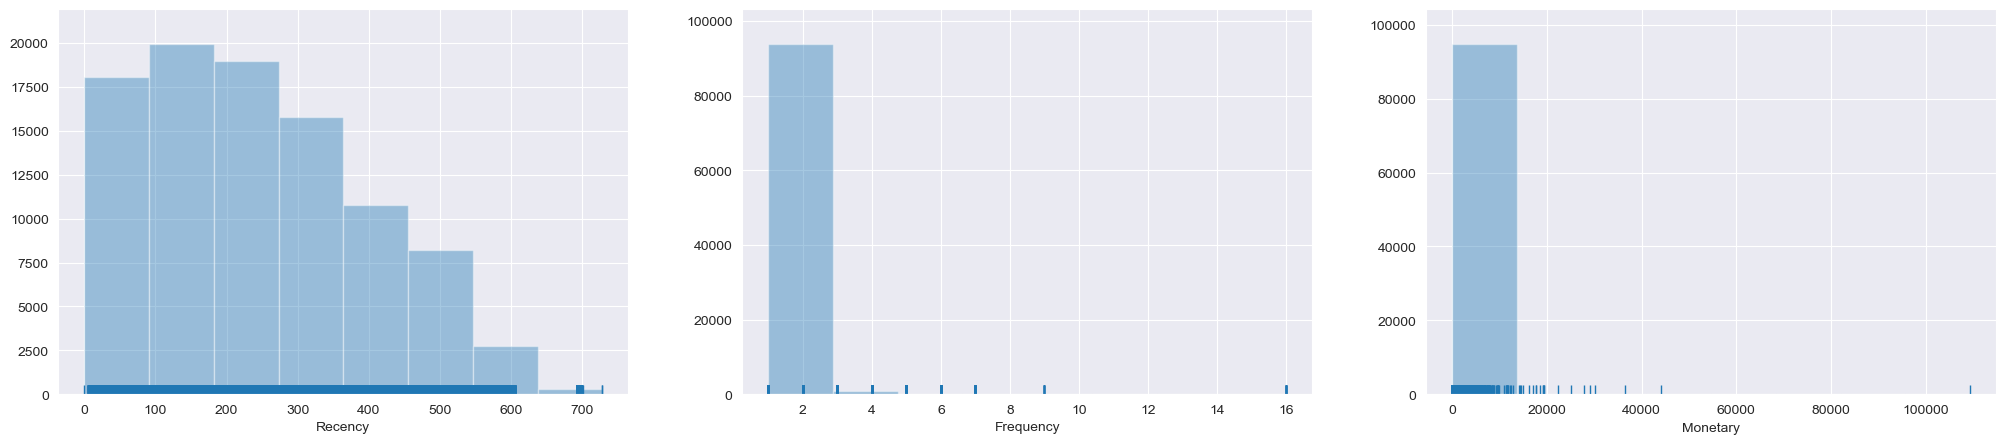

In [49]:
plt.figure(figsize=(25, 5))
plt.subplot(1, 3, 1); sns.distplot(data_rfm['Recency'], bins=8,kde=False,rug=True)
plt.subplot(1, 3, 2); sns.distplot(data_rfm['Frequency'], bins=8,kde=False,rug=True)
plt.subplot(1, 3, 3); sns.distplot(data_rfm['Monetary'], bins=8,kde=False,rug=True)
plt.show()

* **Recency** - The concentration of customer is high in last 300-400 days, ie in the year.
* **Frequency** - Customers who order 1 or 2 times are more and then we see who orders more times.
* **Monetary** - Customers spending is mostly around 2000 Brazilian Real.

<Axes: >

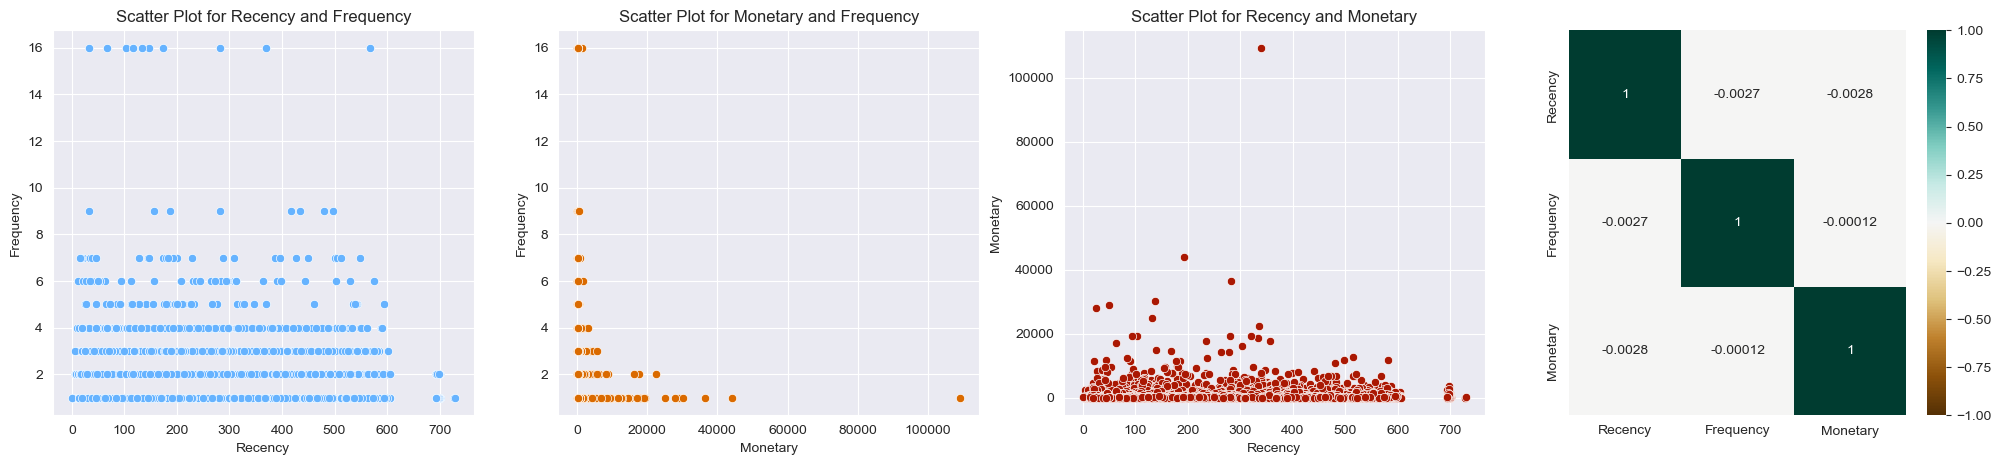

In [50]:
plt.figure(figsize=(25, 5))

plt.subplot(1, 4, 1)
sns.scatterplot(x=data_rfm['Recency'], y=data_rfm['Frequency'], color="#66b3ff")
plt.title('Scatter Plot for Recency and Frequency') 
plt.xlabel('Recency')
plt.ylabel('Frequency')

plt.subplot(1, 4, 2)
sns.scatterplot(x=data_rfm['Monetary'], y=data_rfm['Frequency'], color="#DA6A00")
plt.title('Scatter Plot for Monetary and Frequency')
plt.xlabel('Monetary')
plt.ylabel('Frequency')


plt.subplot(1, 4, 3)
sns.scatterplot(x=data_rfm['Recency'], y=data_rfm['Monetary'], color="#AA1803")
plt.title('Scatter Plot for Recency and Monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary')

plt.subplot(1, 4, 4)
sns.heatmap(data_rfm[['Recency', 'Frequency', 'Monetary']].corr(), vmin=-1, vmax=1, annot=True, cmap="BrBG")


We can not see strong relation between recency, frequency and monetry. lets merge them together and create a merged score.

##### Ranking customer on the basis of RFM scores

In [51]:
data_rfm["recency_score"]  = pd.qcut(data_rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
data_rfm["frequency_score"]= pd.qcut(data_rfm['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
data_rfm["monetary_score"] = pd.qcut(data_rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

data_rfm['score_rfm'] = data_rfm.recency_score.astype(str)+ data_rfm.frequency_score.astype(str) + data_rfm.monetary_score.astype(str)
data_rfm.head()

customer_unique_id order_purchase_timestamp  Recency  \
0  0000366f3b9a7992bf8c76cfdf3221e2      2018-05-10 10:56:27      116   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      2018-05-07 11:11:27      119   
2  0000f46a3911fa3c0805444483337064      2017-03-10 21:05:03      542   
3  0000f6ccb0745a6a4b88665a16c9f078      2017-10-12 20:29:41      326   
4  0004aac84e0df4da2b147fca70cf8255      2017-11-14 19:45:42      293   

   Frequency  Monetary recency_score frequency_score monetary_score score_rfm  
0          2    141.90             4               5              4       454  
1          2     27.19             4               5              1       451  
2          2     86.22             1               5              2       152  
3          1     43.62             2               1              1       211  
4          1    196.89             2               1              4       214

### RFM Segmentation

RFM segmentation is especially useful for eCommerce platforms, as it allows the company to identify different customer segments based on their actual behavior and to implement more profitable strategies.


In [52]:
seg_map= {
    r'111|112|121|131|141|151': 'Lost customers',
    r'332|322|233|232|223|222|132|123|122|212|211': 'Hibernating customers', 
    r'155|154|144|214|215|115|114|113': 'Cannot Lose Them',
    r'255|254|245|244|253|252|243|242|235|234|225|224|153|152|145|143|142|135|134|133|125|124': 'At Risk',
    r'331|321|312|221|213|231|241|251': 'About To Sleep',
    r'535|534|443|434|343|334|325|324': 'Need Attention',
    r'525|524|523|522|521|515|514|513|425|424|413|414|415|315|314|313': 'Promising',
    r'512|511|422|421|412|411|311': 'New Customers',
    r'553|551|552|541|542|533|532|531|452|451|442|441|431|453|433|432|423|353|352|351|342|341|333|323': 'Potential Loyalist',
    r'543|444|435|355|354|345|344|335': 'Loyal',
    r'555|554|544|545|454|455|445': 'Champions'
}

In [53]:
data_rfm['Segments'] = data_rfm['recency_score'].astype(str) + data_rfm['frequency_score'].astype(str) + data_rfm['monetary_score'].astype(str)
data_rfm['Segments'] = data_rfm['Segments'].replace(seg_map, regex=True)
data_rfm.head()

customer_unique_id order_purchase_timestamp  Recency  \
0  0000366f3b9a7992bf8c76cfdf3221e2      2018-05-10 10:56:27      116   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      2018-05-07 11:11:27      119   
2  0000f46a3911fa3c0805444483337064      2017-03-10 21:05:03      542   
3  0000f6ccb0745a6a4b88665a16c9f078      2017-10-12 20:29:41      326   
4  0004aac84e0df4da2b147fca70cf8255      2017-11-14 19:45:42      293   

   Frequency  Monetary recency_score frequency_score monetary_score score_rfm  \
0          2    141.90             4               5              4       454   
1          2     27.19             4               5              1       451   
2          2     86.22             1               5              2       152   
3          1     43.62             2               1              1       211   
4          1    196.89             2               1              4       214   

                Segments  
0              Champions  
1     Potential Loyalist  
2                At Risk  
3  Hibernating customers  
4       Cannot Lose Them

In [54]:
data_rfm.groupby('Segments', as_index=False).agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary': "mean"
})

Segments     Recency  Frequency    Monetary
0          About To Sleep  283.176660   1.055037   52.740977
1                 At Risk  392.555428   1.124466  299.468646
2        Cannot Lose Them  440.881890   1.098341  365.347799
3               Champions   90.020617   1.263820  470.426198
4   Hibernating customers  347.258146   1.000000   80.284560
5          Lost customers  480.792827   1.083544   45.146930
6                   Loyal  182.139434   1.111980  389.339106
7          Need Attention  160.632858   1.000000  277.841192
8           New Customers  128.444444   1.000000   53.483047
9      Potential Loyalist  135.770353   1.165740   75.433454
10              Promising  111.229806   1.000000  292.152188

### Preparing the data for clustering

In [55]:
data_rfm_kmeans = data_rfm.drop(['order_purchase_timestamp',"recency_score", "frequency_score", "monetary_score", "score_rfm", "Segments"], axis=1)
#data_rfm_kmeans = data_rfm.copy()

Text(0.5, 1.0, 'Distribution for Monetary')

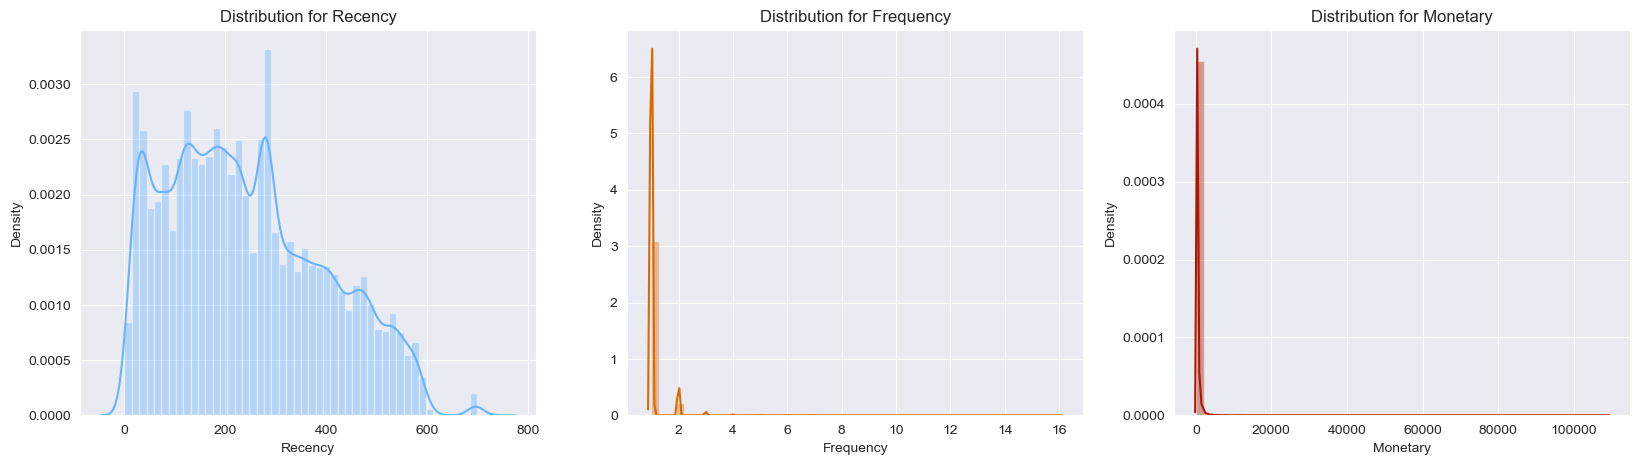

In [56]:
plt.subplots(1, 3, figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.distplot(data_rfm_kmeans['Recency'], color="#66b3ff")
plt.title('Distribution for Recency') 

plt.subplot(1, 3, 2)
sns.distplot(data_rfm_kmeans['Frequency'], color="#DA6A00")
plt.title('Distribution for Frequency') 

plt.subplot(1, 3, 3)
sns.distplot(data_rfm_kmeans['Monetary'], color="#AA1803")
plt.title('Distribution for Monetary') 

Frequency and Monetary are highly skewed i.e. the data is not evenly distributed. Applying log transformation to Frequency and Monetary to reduce the skewness.

Text(0.5, 1.0, 'Distribution for Monetary')

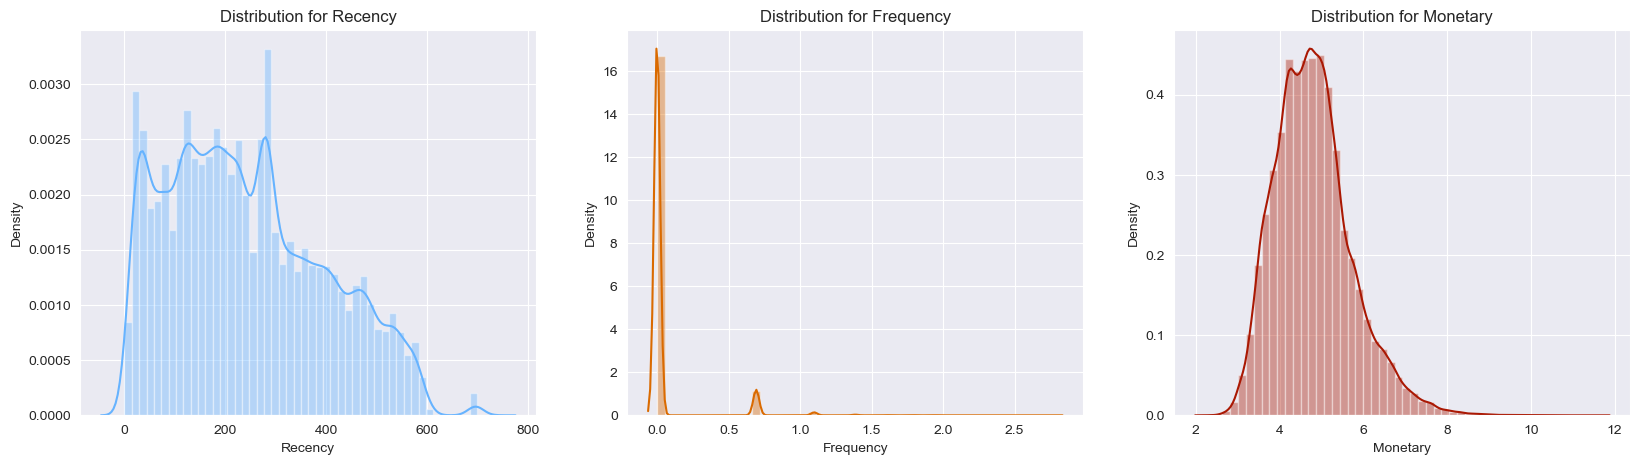

In [57]:
cols = ['Frequency', 'Monetary']

for col in cols:
    data_rfm_kmeans[col] = np.log(data_rfm_kmeans[col])


plt.subplots(1, 3, figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.distplot(data_rfm_kmeans['Recency'], color="#66b3ff")
plt.title('Distribution for Recency') 

plt.subplot(1, 3, 2)
sns.distplot(data_rfm_kmeans['Frequency'], color="#DA6A00")
plt.title('Distribution for Frequency') 

plt.subplot(1, 3, 3)
sns.distplot(data_rfm_kmeans['Monetary'], color="#AA1803")
plt.title('Distribution for Monetary')

Adding extra features to the dataframe per customer 

In [58]:
data_cluster = data_rfm_kmeans.copy()
data_cluster = data_cluster.merge(data_train.groupby('customer_unique_id')['freight_value'].agg('sum'),how='left',on='customer_unique_id')
data_cluster = data_cluster.merge(data_train.groupby('customer_unique_id')['delivery_days'].agg('mean'),how='left',on='customer_unique_id')
data_cluster = data_cluster.merge(data_train.groupby('customer_unique_id')['review_score'].agg('mean'),how='left',on='customer_unique_id')
data_cluster = data_cluster.merge(data_train.groupby('customer_unique_id')['length_reviews_comment'].agg('mean'),how='left',on='customer_unique_id')
data_cluster = data_cluster.merge(data_train.groupby('customer_unique_id')['number_reviews'].agg('mean'),how='left',on='customer_unique_id')
data_cluster['avg_comment'] = data_cluster['length_reviews_comment']/data_cluster['number_reviews']
data_cluster.drop(['length_reviews_comment', 'number_reviews'], axis=1, inplace=True)
data_cluster

customer_unique_id  Recency  Frequency  Monetary  \
0      0000366f3b9a7992bf8c76cfdf3221e2      116   0.693147  4.955123   
1      0000b849f77a49e4a4ce2b2a4ca5be3f      119   0.693147  3.302849   
2      0000f46a3911fa3c0805444483337064      542   0.693147  4.456902   
3      0000f6ccb0745a6a4b88665a16c9f078      326   0.000000  3.775516   
4      0004aac84e0df4da2b147fca70cf8255      293   0.000000  5.282645   
...                                 ...      ...        ...       ...   
94715  fffcf5a5ff07b0908bd4e2dbc735a684      452   0.000000  8.327204   
94716  fffea47cd6d3cc0a88bd621562a9d061      267   0.000000  4.437698   
94717  ffff371b4d645b6ecea244b27531430a      573   0.000000  4.722598   
94718  ffff5962728ec6157033ef9805bacc48      124   0.000000  4.895524   
94719  ffffd2657e2aad2907e67c3e9daecbeb      489   0.000000  4.270536   

       freight_value  delivery_days  review_score  avg_comment  
0              12.00            4.0           5.0        111.0  
1               8.29            4.0           4.0          0.0  
2              17.22            1.0           3.0          0.0  
3              17.63           11.0           4.0         12.0  
4              16.89            7.0           5.0          0.0  
...              ...            ...           ...          ...  
94715         497.42           26.0           5.0          0.0  
94716          19.69            2.0           4.0          0.0  
94717          22.56           29.0           5.0          0.0  
94718          18.69           13.0           5.0        133.0  
94719          14.57           15.0           5.0          0.0  

[94720 rows x 8 columns]

Scaling the data for better calculation

In [59]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data_cluster_scaled = pd.DataFrame(scaler.fit_transform(data_cluster.iloc[:,1:8]), columns=data_cluster.iloc[:,1:8].columns )

<Axes: ylabel='Frequency'>

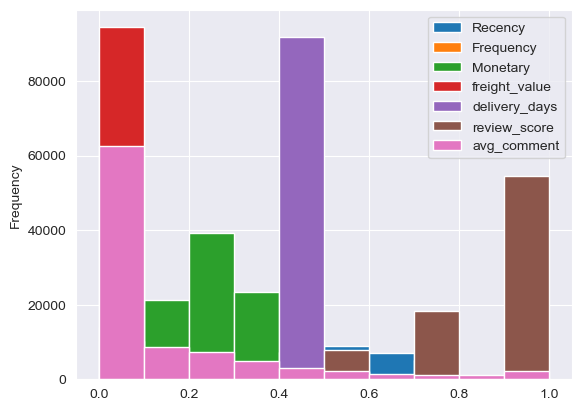

In [60]:
data_cluster_scaled.plot(kind='hist')

### Unsupervised machine learning

**Silhouette score** is in the range of -1 to 1. A score near 1 denotes the best meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters. The worst value is -1. Values near 0 denote overlapping clusters.
The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

**calinski_harabasz_score** It is also known as the Variance Ratio Criterion. The score is defined as ratio of the sum of between-cluster dispersion and of within-cluster dispersion. A higher Calinski-Harabasz score relates to a model with better defined clusters.



**davies_bouldin_score** The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score. The minimum score is zero, with lower values indicating better clustering.

In [61]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from math import pi

def rmf_plot(data, label):
        # Frequency V Monetary
    fig, axe = plt.subplots(1, 3, figsize = (20, 5) )
    sns.set_context(context = 'notebook', font_scale=1)
    sns.scatterplot(
        x = 'Frequency', 
        y = 'Monetary', 
        hue = label,
        data = data,
        palette='Set1', ax=axe[0])
    plt.title('Frequency V Monetary')
    plt.ylabel('Monetary')
    plt.xlabel('Frequency')
    # Monetary V Recency
    sns.set_context(context = 'notebook', font_scale=1)
    sns.scatterplot(
        x = 'Recency', 
        y = 'Monetary', 
        hue = label,
        data = data,
        palette='Set1', ax=axe[1])
    plt.title('Recency V Monetary')
    plt.ylabel('Monetary')
    plt.xlabel('Recency')
    # Frequency V Recency
    sns.set_context(context = 'notebook', font_scale=1)
    sns.scatterplot(
        x = 'Frequency', 
        y = 'Recency', 
        hue = label,
        data = data,
        palette='Set1', ax=axe[2])
    plt.title('Frequency V Recency')
    plt.ylabel('Recency')
    plt.xlabel('Frequency')
    plt.show()


 
def radar_plot(data, label):
    # Set data
    df = data.groupby([label], as_index=False).agg({
                'Recency': 'mean',
                'Frequency': 'mean',
                'Monetary': 'mean',
                'freight_value': 'mean',
                'review_score': 'mean',
                'delivery_days': 'mean',
                'avg_comment': 'mean',
            })
    
    # ------- PART 1: Create background
    
    # number of variable
    categories=list(df)[1:]
    N = len(categories)
    colorp = ['#4d86a5', '#cf0bf1', '#12e2f1', '#3e517a', '#98da1f', '#fc9f5b', '#d60b2d', '#9cc76d', '#2dffdf', '#c3c4e9']
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    plt.figure(figsize=(10, 10))
    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)
    
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], categories)
    
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.2,0.4,0.6,0.8, 1], ['0.2','0.4','0.6','0.8', '1'], color="grey", size=7)
    plt.ylim(0,1)
    

    # ------- PART 2: Add plots
    
    # Plot each individual = each line of the data
    # I don't make a loop, because plotting more than 3 groups makes the chart unreadable
    
    for x in range(len(df)):
        values=df.loc[x].drop(label).values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1.5, linestyle='solid', label=f"Cluster : {x}", color=colorp[x])
        ax.fill(angles, values, colorp[x], alpha=0.2)
    
    
    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title("Radar map of features and cluster")
    # Show the graph
    plt.show()




def plothist(data, huelabel):
    fig, axs = plt.subplots(2, 4, figsize=(20, 10))	
    sns.kdeplot(data=data, x="Recency",  ax=axs[0, 0], hue=huelabel, palette='Set2')
    sns.kdeplot(data=data, x="Frequency",  ax=axs[0, 1], hue=huelabel, palette='Set2')
    sns.kdeplot(data=data, x="Monetary",  ax=axs[0, 2], hue=huelabel, palette='Set2')
    sns.kdeplot(data=data, x="freight_value",  ax=axs[0, 3], hue=huelabel, palette='Set2')
    sns.kdeplot(data=data, x="review_score",  ax=axs[1, 0], hue=huelabel, palette='Set2')
    sns.kdeplot(data=data, x="delivery_days",  ax=axs[1, 1], hue=huelabel, palette='Set2')
    sns.kdeplot(data=data, x="avg_comment",  ax=axs[1, 2], hue=huelabel, palette='Set2')

## Kmeans

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score


dist_value = []
sil_score = []
davies_score = []
range_n_clusters = range(3,14)
for k in range_n_clusters:
    kmeanModel1 = KMeans(n_clusters=k)
    kmeanModel1.fit(data_cluster_scaled)
    dist_value.append(kmeanModel1.inertia_)
    sil_score.append(silhouette_score(data_cluster_scaled, kmeanModel1.labels_))
    davies_score.append(davies_bouldin_score(data_cluster_scaled, kmeanModel1.labels_))
    
plt.subplots(figsize=(20, 5))
plt.subplot(1,3,1)
plt.plot(range_n_clusters, dist_value, 'bx-', color = "#66b3ff")
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal number of clusters (k)')

plt.subplot(1,3,2)
plt.plot(range_n_clusters,sil_score, color="#DA6A00")
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal number of clusters')


plt.subplot(1,3,3)
plt.plot(range_n_clusters,davies_score, color="#AA1803")
plt.xlabel('Number of clusters') 
plt.ylabel('Davies bouldin score') 
plt.title('Davies bouldin score For Optimal number of clusters')


As per all the metrics we are defining the clustering size to 6

In [61]:
kmeansSelected= KMeans(n_clusters=6)
kmeansSelected.fit(data_cluster_scaled)

clustered_kmeans = data_cluster_scaled.copy()
clustered_kmeans['labels_kmeans']= kmeansSelected.labels_

rfm_labels = pd.DataFrame(data=kmeansSelected.labels_, columns=['kmeans'])
# groupig the recency, frequency and monetary value on the basis of clusters
clustered_kmeans.groupby(['labels_kmeans']).agg({
            'Recency': 'mean',
            'Frequency': 'mean',
            'Monetary': ['mean', 'count'],
            'freight_value': 'mean',
            'review_score': ['mean', 'count'],
            'delivery_days': 'mean',
            'avg_comment': 'mean',
        })

Recency Frequency  Monetary        freight_value review_score  \
                   mean      mean      mean  count          mean         mean   
labels_kmeans                                                                   
0              0.254660  0.020608  0.329665  17847      0.013704     0.666023   
1              0.590130  0.019704  0.329576  22621      0.012913     0.935333   
2              0.340218  0.019771  0.375016   5390      0.016365     0.114574   
3              0.330918  0.020898  0.343952   7681      0.013684     0.893329   
4              0.338806  0.019661  0.354519   8747      0.015771     0.060593   
5              0.196832  0.020550  0.328592  32434      0.012895     0.999172   

                     delivery_days avg_comment  
               count          mean        mean  
labels_kmeans                                   
0              17847      0.445650    0.043621  
1              22621      0.446381    0.051970  
2               5390      0.451254    0.755230  
3               7681      0.447102    0.526889  
4               8747      0.454118    0.150626  
5              32434      0.446249    0.042239

In [62]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


data_score_clustering = pd.DataFrame(columns=['Model', 'Number_of_cluster', 'silhouette_score', 'calinski_harabasz_score', 'davies_bouldin_score'])

data_score_clustering.loc[0] = ["Kmeans", 6, silhouette_score(data_cluster_scaled, kmeansSelected.labels_), calinski_harabasz_score(data_cluster_scaled, kmeansSelected.labels_), davies_bouldin_score(data_cluster_scaled, kmeansSelected.labels_)]


print("kmeans Silhouette score with 6 cluster", data_score_clustering.loc[0]['silhouette_score'])
print("kmeans Calinski harabasz score with 6 cluster", data_score_clustering.loc[0]['calinski_harabasz_score'])
print("kmeans Davies bouldin score with 6 cluster", data_score_clustering.loc[0]['davies_bouldin_score'])


kmeans Silhouette score with 6 cluster 0.3028487479491838
kmeans Calinski harabasz score with 6 cluster 46534.772025283026
kmeans Davies bouldin score with 6 cluster 1.1213378708440185


In [63]:
fig2 = px.scatter_3d(clustered_kmeans, x='Recency', y='Frequency', z='Monetary', color='labels_kmeans',width=1000, height=700)
fig2.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig2.show()

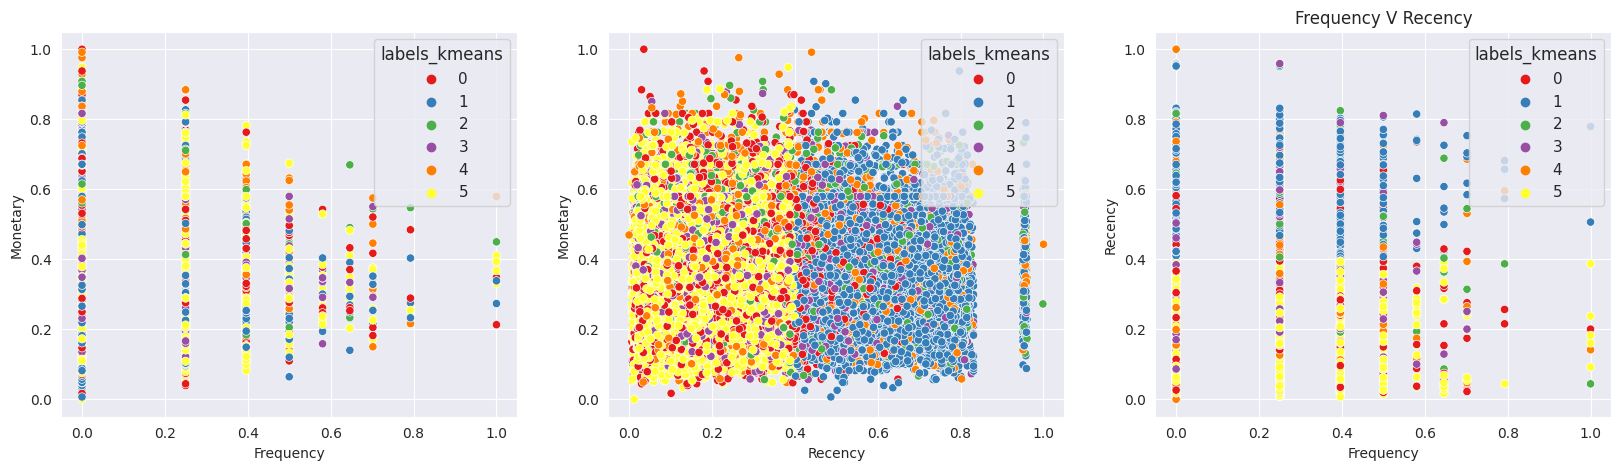

In [64]:
rmf_plot(clustered_kmeans, 'labels_kmeans')

Text(0.5, 1.0, 'Mean feature values per cluster')

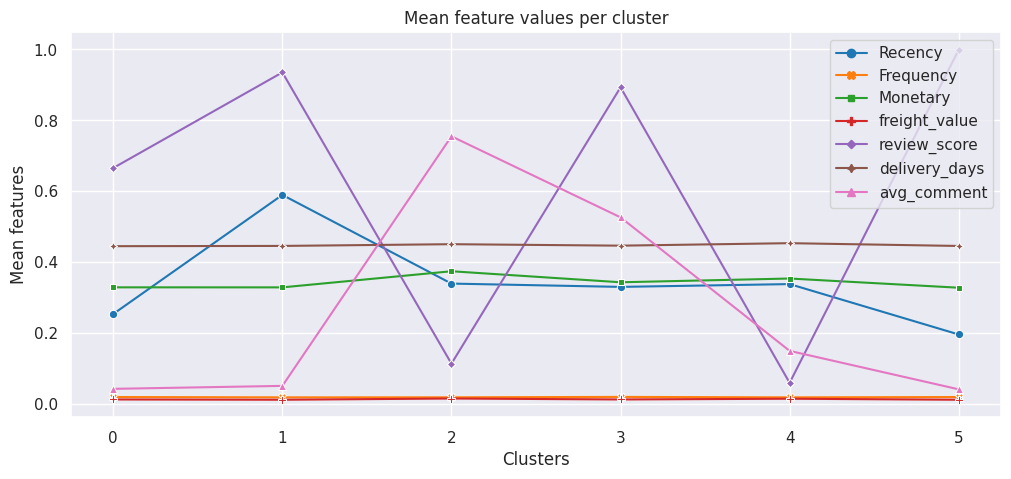

In [65]:
group_kmeans = clustered_kmeans.groupby(['labels_kmeans'], as_index=False).agg({
            'Recency': 'mean',
            'Frequency': 'mean',
            'Monetary': 'mean',
            'freight_value': 'mean',
            'review_score': 'mean',
            'delivery_days': 'mean',
            'avg_comment': 'mean',
        })
plt.figure(figsize=(12, 5))
sns.lineplot(data=group_kmeans.iloc[:,1:], markers=True, dashes=False)
plt.xlabel("Clusters")
plt.ylabel("Mean features")
plt.title("Mean feature values per cluster")

In [66]:
group_kmeans.round(2)

labels_kmeans  Recency  Frequency  Monetary  freight_value  review_score  \
0              0     0.25       0.02      0.33           0.01          0.67   
1              1     0.59       0.02      0.33           0.01          0.94   
2              2     0.34       0.02      0.38           0.02          0.11   
3              3     0.33       0.02      0.34           0.01          0.89   
4              4     0.34       0.02      0.35           0.02          0.06   
5              5     0.20       0.02      0.33           0.01          1.00   

   delivery_days  avg_comment  
0           0.45         0.04  
1           0.45         0.05  
2           0.45         0.76  
3           0.45         0.53  
4           0.45         0.15  
5           0.45         0.04

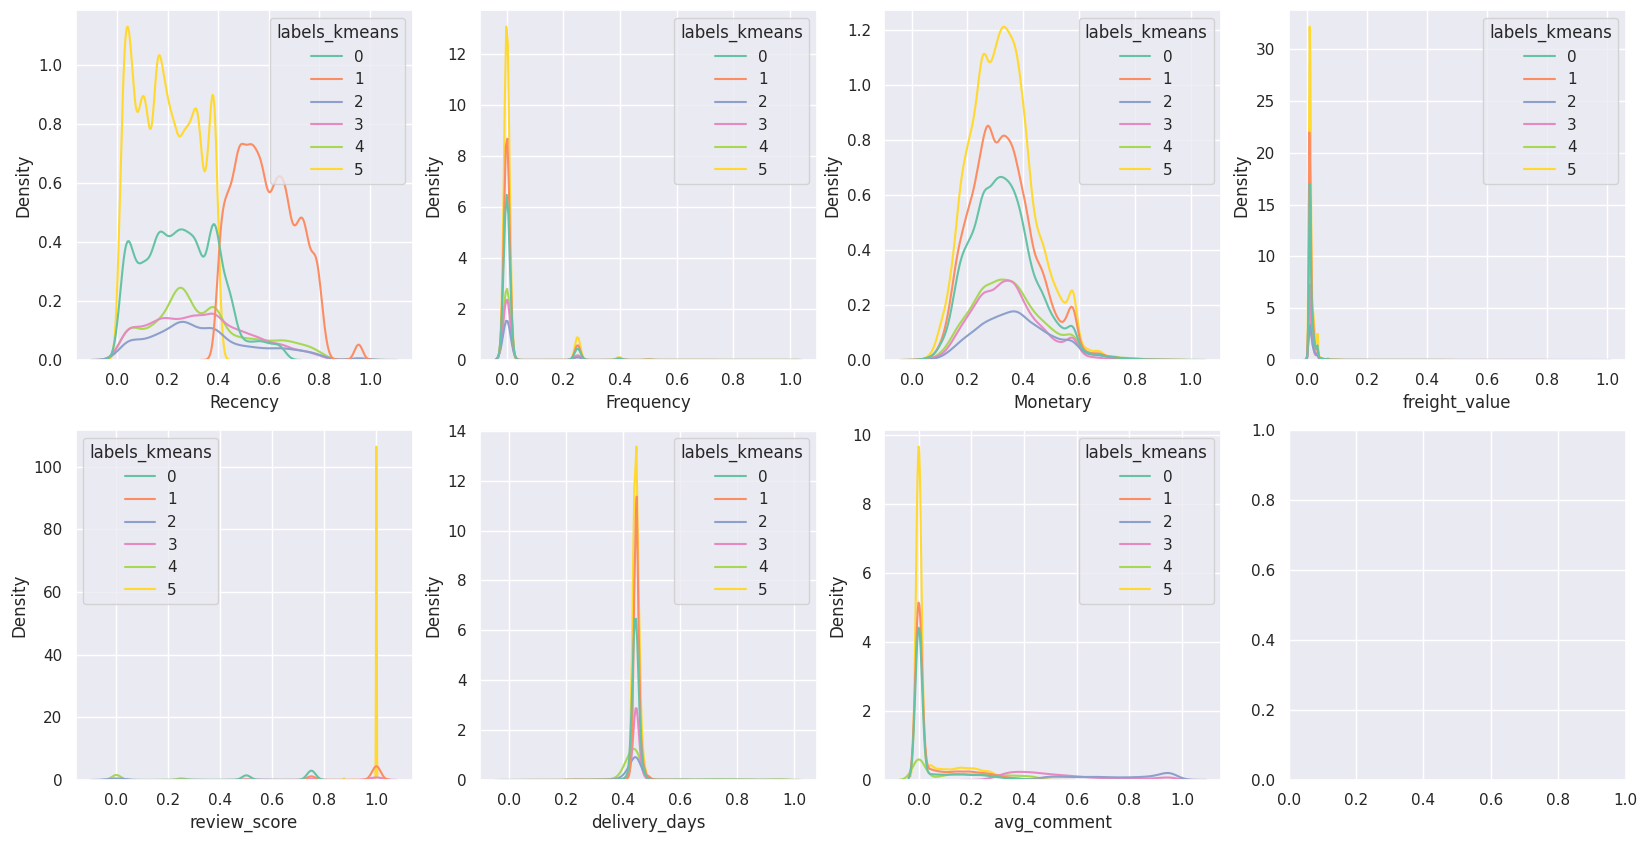

In [67]:
plothist(clustered_kmeans, 'labels_kmeans')

### Conclusions : 

- **Montrez d’où viennent le plus de chiffre d’affaire :** La plupart des clients proviennent de São Paulo, la ville avec le plus grand nombre de clients.